# 5. Árboles de Decisión

Veremos árboles de decisión y los conceptos subyacentes asociados.

Haremos ejemplos de juguete y con datos generados artificialmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Entropía y Ganancia de Información

### Entropía

Definamos entropía para una distribución probabilista:

$$H(Y) = - \sum_{i=1}^k P(Y = y_i) log_2 P(Y = y_i)$$

In [2]:
# definimos una funcion que vamos a usar para calcular la Entropia, tal como esta definida matematicamente en
# la celda de arriba

def entropy(probs):
# probs: es un array en el que cada elemente es la probabilidad de que ocurra un determinado evento
    return - np.sum(probs * np.log2(probs))

Veamos posibles entropías para el problema de tirar una moneda adulterada:<br>
Cuando una moneda normal es lanzada al aire, la probabilidad de que salga CARA es exactamente igual a la probabilidad de que salga CRUZ (o CECA)  

In [3]:
probabilidad_cara = 0.5
probabilidad_ceca = 0.5

entropy(np.array([probabilidad_cara, probabilidad_ceca]))

1.0

Si la moneda estuviera adulterada y la probabildad de obtener cara fuera diferente de la probabilidad de obtener seca enotnces la entropia seria menor a 1

In [4]:
probabilidad_cara = 0.01 # 1 de cada 100 lanzamientos cae de CARA
probabilidad_ceca = 0.99 # 99 de cada 100 lanzamientos caen CECA
entropy(np.array([probabilidad_cara, probabilidad_ceca]))

0.08079313589591118

En conclusion si las probabilidades de los dos eventos son iguales, el valor de la entropia alcanze su maximo, que es 1.<br>
A partir de ahi, a medida que aumenta la probabilidad de un evento y disminuye la del otro, la entropia va disminuyendo su valor.<br>
Si lo analizamos graficamente...

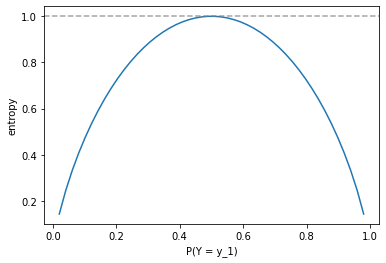

In [5]:
X = np.linspace(0, 1)[1:-1]

plt.plot(X, [entropy([x, 1-x]) for x in X])
plt.xlabel('P(Y = y_1)')
plt.ylabel('entropy')

plt.axhline(y=1, color = 'grey', alpha = 0.7, linestyle='--')

plt.show()

La entropía se puede interpretar como la cantidad de bits necesarias para codificar una predicción.
En el caso de dos monedas, tenemos cuatro resultados posibles. Ejemplos:

In [6]:
entropy(np.array([0.25, 0.25, 0.25, 0.25]))

2.0

In [7]:
entropy(np.array([0.49, 0.49, 0.01, 0.01]))

1.1414405425418206

### Entropía de un Dataset

Entendemos por **"Entropia del dataset"** a la entropia de la variable de salida que es de interes para la clasificacion que sera hecha con ese dataset.
Un dataset define una distribución empírica. La entropía del dataset es entones la entropía de la distribución asociada. Definamos el cálculo de la distribución, y luego redefinamos entropía:

In [8]:
def probs(y):
    _, counts = np.unique(y, return_counts=True) # "_" se usa para dejar vacia esa variable, porque no la vamos a usar
    probs = counts / counts.sum()
    return probs # la salida de esta funcion es la probabilidad de que la variable de salida tome los valores unicos
# que estan dentro del array que se le da de comer a la funcion

In [9]:
# supongamos que tenemos un pequeno dataset en el que las etiquetas de la variable de salida son estas:
y_true = np.array([1, 1, 1, 1, 1, -1])
y_true

array([ 1,  1,  1,  1,  1, -1])

In [10]:
probs(y_true)

array([0.16666667, 0.83333333])

In [11]:
# definimos una funcion de entropia que sea util para los el caso que estamos analizando ahora en el que tenemos
# un conjuto de etiquetas y_true
def entropy(y):
    p = probs(y)
    return - np.sum(p * np.log2(p))

In [12]:
# calculamos la entropia de todo el dataset
entropy(y_true)

0.6500224216483541

### Entropía Condicional

Definamos entropía condicional:

$$H(Y|X) = - \sum_{j=1}^v P(X = x_j) \sum_{i=1}^k P(Y = y_i | X = x_j) log_2 P(Y = y_i | X = x_j)$$

Equivalentemente, 

$$H(Y|X) = \sum_{j=1}^v P(X = x_j) H(Y|X = x_j)$$

Tomaremos $X$ binaria ($v=2$), por lo que la entropía condicional tendrá sólo dos términos.


In [13]:
def cond_entropy(y1, y2): # en este caso solo sera aplicable a casos donde tenemos 2 categorias
    size = y1.shape[0] + y2.shape[0]
    return y1.shape[0] / size * entropy(y1) + y2.shape[0] / size * entropy(y2) 

In [14]:
# supongamos que tenemos un pequeno dataset 
cond_entropy(np.array([1,1,1,1]), np.array([1,-1]))  # x1

0.3333333333333333

In [15]:
# situvieramos otro dataset
cond_entropy(np.array([1,1,1]), np.array([1,1,-1]))  # x2

0.4591479170272448

### Ganancia de Información

La ganancia de información será simplemente la diferencia entre entropía y entropía condicional:

In [16]:
def information_gain(y1, y2):
    y = np.concatenate((y1,y2))
    return entropy(y) - cond_entropy(y1,y2)

In [17]:
information_gain(np.array([1,1,1,1]), np.array([1,-1]))  # x1

0.3166890883150208

In [18]:
information_gain(np.array([1,1,1]), np.array([1,1,-1]))  # x2

0.19087450462110933

## Datos Sintéticos No Linealmente Separables

Haremos algunos experimentos con datos generados sintéticamente. Estos datos serán no linealmente separables.

Ejemplos típicos de datos no linealmente separables son los de tipo "OR", "AND" y "XOR". Usaremos datos de tipo "OR" para este ejemplo.



In [19]:
size = 200

In [20]:
np.random.seed(0)
X = np.random.randn(size, 2)
y_true = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)    # datos "OR"

# Estos dos casos los dejamos a un lado y los vamos a analizar mas adelante.
#y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # datos "XOR"
#y_true = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)  # datos "AND"
y_true = y_true.astype(int)
y_true[y_true == 0] = -1

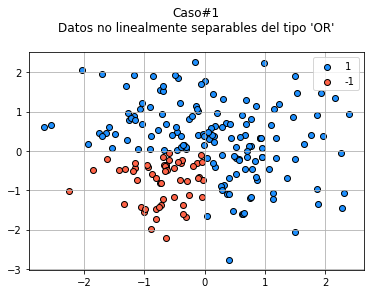

In [21]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="tomato", edgecolors='k', label="-1")
plt.grid()
plt.legend()
plt.title("Caso#1\nDatos no linealmente separables del tipo 'OR'\n")
plt.show()

En un caso como este no es posible entrenar un modelo de prediccion basado en regresion logistica o el algoritmo del perceptron (que son dos algoritmos que habiamos visto antes en esta materia que permitian clasificar casos que fueran linealmente separables)<br>
Para intentar resolver este problema de clasificacion vamos a utilizar un algoritmo del tipo **Arbol de decision**

### División en Entrenamiento y Evaluación

Separemos la mitad para entrenamiento y la otra para evaluación.

In [22]:
# en este caso vamos a hacer una separacion manual de los datos dentrenamiento
train_size = 100
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]
X_train.shape, X_test.shape

((100, 2), (100, 2))

### Clasificación Lineal

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [23]:
from sklearn.linear_model import LogisticRegression
#1. Defino el modelo que voy a utilzar
model = LogisticRegression()

# 2. entreno el modelo utilizando los datos de entrenamiento y las etiquetas de entrenamientos
model.fit(X_train, y_train)


LogisticRegression()

Calculemos la calidad de la predicción en entrenamiento y evaluación:

In [24]:
# 3. Usamos el modelo para predecir las etiquetas de los datos de entrenamiento y de validacion
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [25]:
# utilizamos la clase accuracy_score() para evaluar la precisino del modelo lineal
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [26]:
print('Resultados-Accuracy-')
print('-'*50 + f'\nAccuracy on Training Data: {train_acc}')
print('-'*50 + f'\nAccuracy on Test Data: {test_acc}')

Resultados-Accuracy-
--------------------------------------------------
Accuracy on Training Data: 0.91
--------------------------------------------------
Accuracy on Test Data: 0.78


Como vemor la accuracy es sensiblemente peor en los datos de validacion que en los datos de entrenamiento.<br>
Esto sugiere que el modelo no es bueno para predecir la variable de salida. Esto ya lo suponiamos porque utilizamos un modelo lineal para clasificar datos que no son linealmente separables.

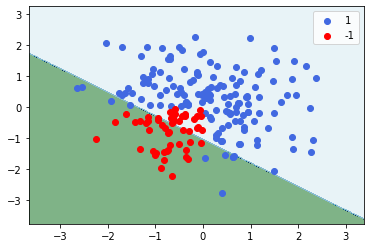

In [27]:
# para visualizar los resultados que obtuvimos antes
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: model.predict(x), X, y_true)

### Nota al Margen: Induciendo Separabilidad Lineal

Muchas veces se pueden convertir datos no linealmente separables en datos separables (o casi) mediante la introducción de nuevos atributos que combinan los atributos existentes.
Un ejemplo de estos son los atributos polinomiales.

Aquí lo haremos con datos "OR", pero la diferencia es mucho más notable con datos de tipo "XOR".

In [28]:
# utilizando el mismo dataset origial que teniamos antes, ahora hacemos una transformacion de manera tal que los datos
# pueden ser se
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pre = PolynomialFeatures(
    degree=2,
    interaction_only=True,  # para usar solo x0*x1, no x0*x0 ni x1*x1
    include_bias=False)
X_train2 = pre.fit_transform(X_train)

In [29]:
X_train.shape, X_train2.shape  # se agregó el feature x0*x1

((100, 2), (100, 3))

Grafiquemos:

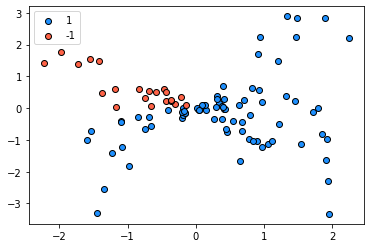

In [30]:
plt.scatter(X_train2[y_train==1, 1], X_train2[y_train==1, 2], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X_train2[y_train==-1, 1], X_train2[y_train==-1, 2], color="tomato", edgecolors='k', label="-1")
plt.legend()
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model_2 = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression()
)
model_2.fit(X_train, y_train);

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.91
Test accuracy: 0.78


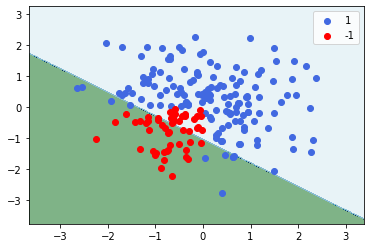

In [34]:
# para visualizar los resultados que obtuvimos antes
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: model.predict(x), X, y_true)

## Modelado por Arboles de decision
### Entropía y Valores Reales

Calculemos la entropía inicial, y veamos cómo condicionar la entropía sobre variales reales (i.e. no categóricas)

In [35]:
# analizamos las etiquetas que tenemos en los datos de entrenemiento
y_train, len(y_train)

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
         1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
         1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1]),
 100)

In [36]:
# recordemos que la division entre datos de entrenamiento y validacion la hicimos de forma manual, por lo que los datos
# pueden no haber quedado balanceados.
y_1 = [y for y in y_train if y ==1]
len(y_1)


79

In [37]:
y_menos_1 = [y for y in y_train if y == -1]
len(y_menos_1)

21

Como muestran las lineas de arriba el data set no esta balanceado. Hay muchas mas valores de salida "1" que "-1"

In [38]:
probs(y_train)

array([0.21, 0.79])

In [39]:
entropy(y_train)

0.7414827399312737

Para hacer una división sobre una variable real usaremos un valor "threshold" (umbral):

In [40]:
def split(X, y, i, threshold):
    y1 = y[X[:, i] > threshold]
    y2 = y[X[:, i] <= threshold]
    return y1, y2

In [41]:
y1, y2 = split(X_train, y_train, 0, 0.00)

In [42]:
y1,y2

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1]))

In [43]:
entropy(y1), entropy(y2)

(-0.0, 0.9731560354421095)

In [44]:
cond_entropy(y1, y2)

0.506041138429897

In [45]:
information_gain(y1,y2)

0.23544160150137672

### Buscando la Mejor División

Ilustraremos un paso en la construcción del árbol de decisión.

Probemos muchos threshold para ambas variables y seleccionemos la mejor división.

En este caso buscaremos en una grilla uniforme de valores, pero existen técnicas mejores.

In [46]:
np.linspace(-2.5, 2.5, 11)

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [47]:
best_ig = 0

for i in [0, 1]:
    for threshold in np.linspace(-2.5, 2.5, 11):
        y1, y2 = split(X_train, y_train, i, threshold)
        ig = information_gain(y1, y2)
        print(f'i={i}\tthreshold={threshold:+00.2f}\tig={ig:.2f}')

        if ig >= best_ig:
            best_ig = ig
            best_feature = i
            best_threshold = threshold

print('Mejor división:')
print(f'feature={best_feature}, threshold={best_threshold}, ig={best_ig:00.2f}')


i=0	threshold=-2.50	ig=0.00
i=0	threshold=-2.00	ig=0.00
i=0	threshold=-1.50	ig=0.00
i=0	threshold=-1.00	ig=0.00
i=0	threshold=-0.50	ig=0.12
i=0	threshold=+0.00	ig=0.24
i=0	threshold=+0.50	ig=0.13
i=0	threshold=+1.00	ig=0.06
i=0	threshold=+1.50	ig=0.03
i=0	threshold=+2.00	ig=0.01
i=0	threshold=+2.50	ig=0.00
i=1	threshold=-2.50	ig=0.00
i=1	threshold=-2.00	ig=0.02
i=1	threshold=-1.50	ig=0.05
i=1	threshold=-1.00	ig=0.06
i=1	threshold=-0.50	ig=0.12
i=1	threshold=+0.00	ig=0.32
i=1	threshold=+0.50	ig=0.15
i=1	threshold=+1.00	ig=0.07
i=1	threshold=+1.50	ig=0.04
i=1	threshold=+2.00	ig=0.00
i=1	threshold=+2.50	ig=0.00
Mejor división:
feature=1, threshold=0.0, ig=0.32


Dividamos los datos de acuerdo a esta frontera:

In [48]:
best_feature, best_threshold

(1, 0.0)

In [49]:
y1, y2 = split(X_train, y_train, best_feature, best_threshold)

Con esta división, la entropía baja considerablemente:

In [50]:
entropy(y_train)

0.7414827399312737

In [51]:
cond_entropy(y1, y2)

0.42

## Árbol de Decisión con Scikit-learn

Aprendamos un árbol de decisión usando scikit-learn. Para ello usaremos la clase `DecisionTreeClassifier`:


In [52]:
from sklearn.tree import DecisionTreeClassifier

# 1. Definimos el modelo y seteamos algunos parametros
clf = DecisionTreeClassifier(max_depth=2, # The maximum depth of the tree
                            criterion='entropy', #{“gini”, “entropy”, “log_loss”}
                            random_state=0)

# 2. Entrenamos el modelo usando los datos de entrenamiento
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [53]:
# 3. Usamos el modelo que entrenamos en el bloque anterior para predecir las variables de salida
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


In [54]:
# 4. Evaluamos el accuracy del modelo obtenido
from sklearn.metrics import accuracy_score

train_acc_clf = accuracy_score(y_train, y_train_pred)
test_acc_clf = accuracy_score(y_test, y_test_pred)

print('Resultados-Accuracy- para DecisionTreeClassifier')
print('-'*50 + f'\nAccuracy on Training Data: {train_acc_clf}')
print('-'*50 + f'\nAccuracy on Test Data: {test_acc_clf}')

Resultados-Accuracy- para DecisionTreeClassifier
--------------------------------------------------
Accuracy on Training Data: 0.99
--------------------------------------------------
Accuracy on Test Data: 0.97


Analizando los resultados de accuracy vemos que el accuray de los datos de entrenamiento es casi igual que el accuracy de los datos de validacion.<br>
Este resultado muestra que el modelo de prediccion basado en arboles de decision es mucho mejor que el modelo basado en regresion logistica que habiamos usado antes.

Dibujamos la frontera de decisión:

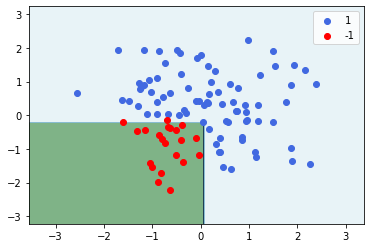

In [55]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)

También podemos inspeccionar el árbol:

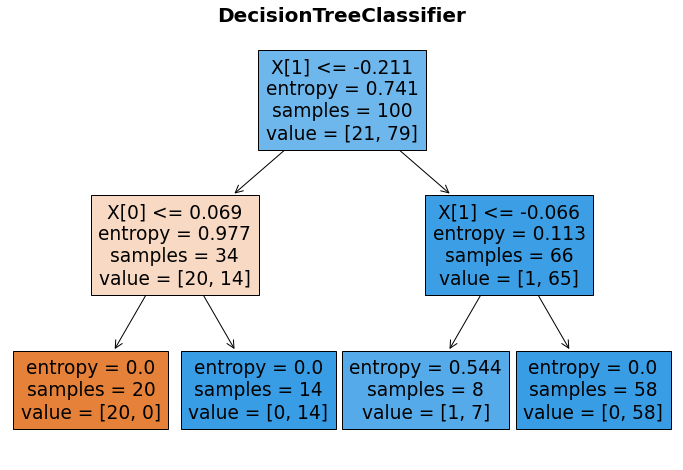

In [56]:
# graficamos el modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree = clf, filled=True)

plt.title('DecisionTreeClassifier', fontsize = 20, fontweight = 'bold')
plt.show()

In [57]:
entropy(y_train)

0.7414827399312737

## Ejercicios

1. Probar todos los experimentos con un dataset de tipo "XOR". ¿Qué sucede al decidir la división en el primer nivel del árbol?

### Datos "XOR"

In [58]:
size = 200

In [59]:
np.random.seed(0)
X = np.random.randn(size, 2)
y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # datos "XOR"

#y_true = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)  # datos "AND"
y_true = y_true.astype(int)
y_true[y_true == 0] = -1

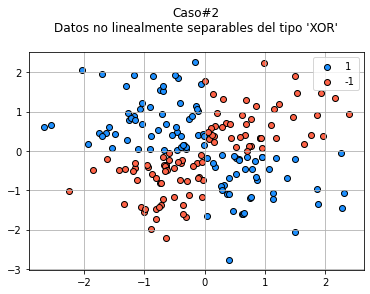

In [60]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="tomato", edgecolors='k', label="-1")
plt.grid()
plt.legend()
plt.title("Caso#2\nDatos no linealmente separables del tipo 'XOR'\n")
plt.show()

### División en Entrenamiento y Evaluación

Separemos la mitad para entrenamiento y la otra para evaluación.

In [61]:
# en este caso vamos a hacer una separacion manual de los datos dentrenamiento
train_size = 100
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]
X_train.shape, X_test.shape

((100, 2), (100, 2))

## Clasificación Lineal

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [62]:
# 1. Definimos el modelo
model_lr = LogisticRegression()

# 2. Entrenamos el modelo
model_lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
# 3. Utilizamos el modelo para predecir los valores de salida
y_train_prediction = model_lr.predict(X_train)
y_test_prediction = model_lr.predict(X_test)

In [64]:
# 4. Analizamos el accuracy del modelo.

train_acc = accuracy_score(y_train, y_train_prediction)
test_acc = accuracy_score(y_test, y_test_prediction)

print('Resultados-Accuracy- para LogisticRegression')
print('-'*50 + f'\nAccuracy on Training Data: {train_acc}')
print('-'*50 + f'\nAccuracy on Test Data: {test_acc}')

Resultados-Accuracy- para LogisticRegression
--------------------------------------------------
Accuracy on Training Data: 0.51
--------------------------------------------------
Accuracy on Test Data: 0.41


Tal como esperabamos, los accuracy tanto para los datos de entrenamiento como para los datos de validacion son muy malos

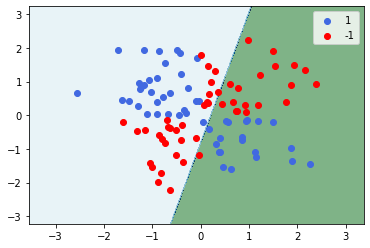

In [65]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: model_lr.predict(x), X_train, y_train)

El analisis grafico confirma que el modelo lineal que entrenamos es muy malo para predecir la clasificacion de los datos.

## Árbol de Decisión con Scikit-learn

Aprendamos un árbol de decisión usando scikit-learn. Para ello usaremos la clase `DecisionTreeClassifier`:


In [66]:
from sklearn.tree import DecisionTreeClassifier

# 1. Definimos el modelo y seteamos algunos parametros
model_DTC = DecisionTreeClassifier(max_depth=3, # The maximum depth of the tree
                            criterion='entropy', #{“gini”, “entropy”, “log_loss”}
                            random_state=0)

# 2. Entrenamos el modelo usando los datos de entrenamiento
model_DTC.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Dada las caracteristicas del dataset, no es suficiente un arbol de profundidad 2. POr ese motivo que necesitamos al menos un arbol de profundidad 3.

In [67]:
# 3. Usamos el modelo que entrenamos en el bloque anterior para predecir las variables de salida
y_train_pred = model_DTC.predict(X_train)
y_test_pred = model_DTC.predict(X_test)


In [68]:
# 4. Evaluamos el accuracy del modelo obtenido
from sklearn.metrics import accuracy_score

train_acc_DTC = accuracy_score(y_train, y_train_pred)
test_acc_DTC = accuracy_score(y_test, y_test_pred)

print('Resultados-Accuracy- para DecisionTreeClassifier')
print('-'*50 + f'\nAccuracy on Training Data: {train_acc_DTC}')
print('-'*50 + f'\nAccuracy on Test Data: {test_acc_DTC}')

Resultados-Accuracy- para DecisionTreeClassifier
--------------------------------------------------
Accuracy on Training Data: 0.97
--------------------------------------------------
Accuracy on Test Data: 0.99


El accuracy del modelo entrenado con un algoritmo del arbol de decision es mucho mejor que el modelo anterior basado en regresion logistica.

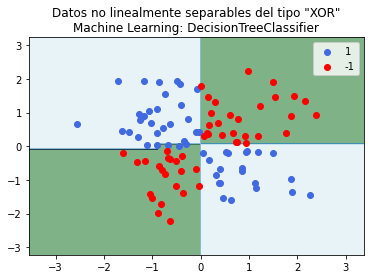

In [69]:
from utils import plot_decision_boundary

plt.figure()
plt.title('Datos no linealmente separables del tipo "XOR"\nMachine Learning: DecisionTreeClassifier')
plot_decision_boundary(lambda x: model_DTC.predict(x), X_train, y_train)

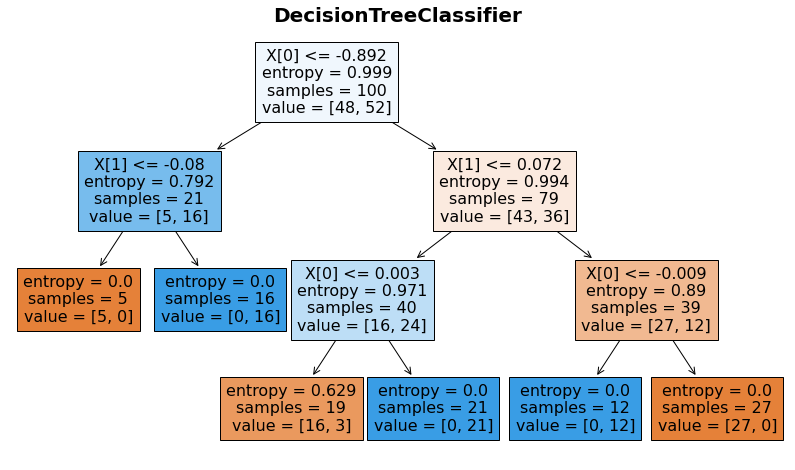

In [70]:
# graficamos el modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(decision_tree = model_DTC, filled=True)

plt.title('DecisionTreeClassifier', fontsize = 20, fontweight = 'bold')
plt.show()

## Referencias

Scikit-learn:

- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [User Guide: Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
